In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm

In [2]:
df = pd.read_csv('diabetes_binary.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,27,0,0,0,1,1,...,1,1,4,0,2,1,1,13,5,6
1,1,1,1,1,30,1,0,0,1,1,...,1,0,3,30,5,0,0,9,6,5
2,0,1,1,1,36,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3,0,0,1,1,25,0,0,0,1,1,...,1,0,1,1,0,0,0,7,6,8
4,0,1,0,1,24,1,0,0,1,1,...,1,0,4,0,0,0,1,13,5,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [5]:
y = df['Diabetes_binary']
X = df.drop('Diabetes_binary', axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

X_trains = pd.DataFrame(X_trains, columns=X.columns)
X_tests = pd.DataFrame(X_tests, columns=X.columns)

In [7]:
X_trains.head(2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-1.133665,-1.052135,-6.327911,1.709109,1.056063,-0.255341,-0.417073,-1.53927,-1.257470,-1.942435,...,-4.611671,-0.324134,0.147121,-0.459770,-0.576881,-0.580316,-0.919317,-0.908981,-1.868681,0.139283
1,0.882094,0.950448,0.158030,2.131550,1.056063,-0.255341,-0.417073,-1.53927,0.795248,-1.942435,...,-4.611671,3.085142,1.943942,3.211118,2.404017,1.723198,-0.919317,0.846928,-2.841160,-1.239850


### Random Forest Model on Original Features

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
rfc = RandomForestClassifier()

rfc.fit(X_trains, y_train)
y_train_pred = rfc.predict(X_trains)
y_test_pred = rfc.predict(X_tests)

y_train_prob= rfc.predict_proba(X_trains)[:,1]
y_test_prob = rfc.predict_proba(X_tests)[:, 1]

print('Train - ROC SCORE', roc_auc_score(y_train, y_train_prob))
print('Train - Accuracy', accuracy_score(y_train, y_train_pred))
print('Train - Class Report', classification_report(y_train, y_train_pred))
print('Train - Confusion Matrix', confusion_matrix(y_train, y_train_pred))

print('Test - ROC SCORE', roc_auc_score(y_test, y_test_prob))
print('Test - Accuracy', accuracy_score(y_test, y_test_pred))
print('Test - Class Report', classification_report(y_test, y_test_pred))
print('Test - Confusion Matrix', confusion_matrix(y_test, y_test_pred))

Train - ROC SCORE 0.9997976211409271
Train - Accuracy 0.995650613347972
Train - Class Report               precision    recall  f1-score   support

           0       0.99      1.00      1.00     23719
           1       1.00      0.99      1.00     23644

    accuracy                           1.00     47363
   macro avg       1.00      1.00      1.00     47363
weighted avg       1.00      1.00      1.00     47363

Train - Confusion Matrix [[23640    79]
 [  127 23517]]
Test - ROC SCORE 0.8075942247884329
Test - Accuracy 0.7350079300441511
Test - Class Report               precision    recall  f1-score   support

           0       0.75      0.70      0.72     11627
           1       0.72      0.77      0.74     11702

    accuracy                           0.74     23329
   macro avg       0.74      0.73      0.73     23329
weighted avg       0.74      0.74      0.73     23329

Test - Confusion Matrix [[8124 3503]
 [2679 9023]]


In [9]:
y_train_prob

array([0.09, 0.95, 0.05, ..., 0.95, 0.13, 0.12])

#### Draw ROC Curve

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_test_prob)

In [11]:
thresh[0] = thresh[0]-1
thresh

array([1.        , 1.        , 0.99      , ..., 0.00125   , 0.00111111,
       0.        ])

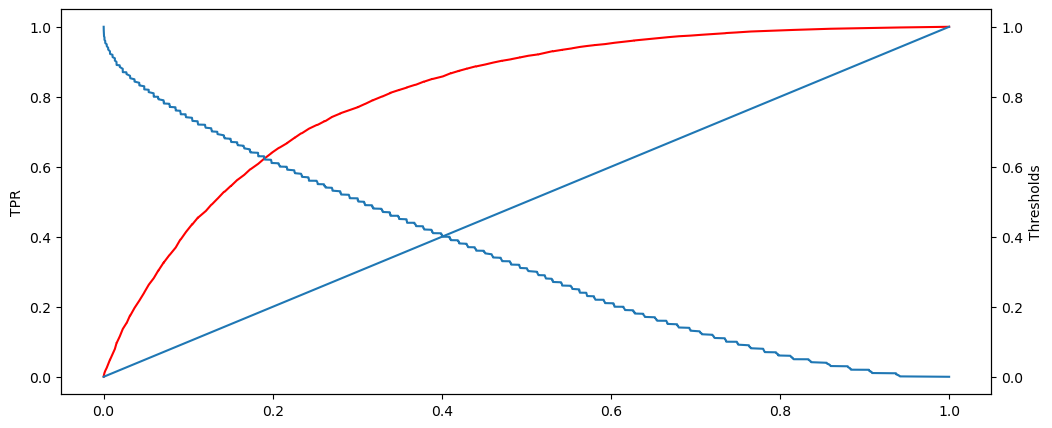

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(fpr, tpr, 'r')
ax.plot(fpr, fpr)
ax.set_ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr, thresh)
ax1.set_ylabel('Thresholds')
plt.show()

### PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

X_train_pc = pca.fit_transform(X_trains)
X_test_pc = pca.transform(X_tests)

In [14]:
rfc = RandomForestClassifier()

rfc.fit(X_train_pc, y_train)
y_train_pred = rfc.predict(X_train_pc)
y_test_pred = rfc.predict(X_test_pc)

y_train_prob= rfc.predict_proba(X_train_pc)[:,1]
y_test_prob = rfc.predict_proba(X_test_pc)[:, 1]

print('Train - ROC SCORE', roc_auc_score(y_train, y_train_prob))
print('Train - Accuracy', accuracy_score(y_train, y_train_pred))
print('Train - Class Report', classification_report(y_train, y_train_pred))
print('Train - Confusion Matrix', confusion_matrix(y_train, y_train_pred))

print('Test - ROC SCORE', roc_auc_score(y_test, y_test_prob))
print('Test - Accuracy', accuracy_score(y_test, y_test_pred))
print('Test - Class Report', classification_report(y_test, y_test_pred))
print('Test - Confusion Matrix', confusion_matrix(y_test, y_test_pred))

Train - ROC SCORE 0.9997901221934545
Train - Accuracy 0.995650613347972
Train - Class Report               precision    recall  f1-score   support

           0       0.99      1.00      1.00     23719
           1       1.00      0.99      1.00     23644

    accuracy                           1.00     47363
   macro avg       1.00      1.00      1.00     47363
weighted avg       1.00      1.00      1.00     47363

Train - Confusion Matrix [[23641    78]
 [  128 23516]]
Test - ROC SCORE 0.8039060311958136
Test - Accuracy 0.7325646191435552
Test - Class Report               precision    recall  f1-score   support

           0       0.75      0.69      0.72     11627
           1       0.72      0.77      0.74     11702

    accuracy                           0.73     23329
   macro avg       0.73      0.73      0.73     23329
weighted avg       0.73      0.73      0.73     23329

Test - Confusion Matrix [[8033 3594]
 [2645 9057]]


### LDA

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

X_train_lda = lda.fit_transform(X_trains, y_train)
X_test_lda = lda.transform(X_tests)

print(X_train_lda.shape, X_test_lda.shape)

(47363, 1) (23329, 1)


In [16]:
rfc = RandomForestClassifier()

rfc.fit(X_train_lda, y_train)
y_train_pred = rfc.predict(X_train_lda)
y_test_pred = rfc.predict(X_test_lda)

y_train_prob= rfc.predict_proba(X_train_lda)[:,1]
y_test_prob = rfc.predict_proba(X_test_lda)[:, 1]

print('Train - ROC SCORE', roc_auc_score(y_train, y_train_prob))
print('Train - Accuracy', accuracy_score(y_train, y_train_pred))
print('Train - Class Report', classification_report(y_train, y_train_pred))
print('Train - Confusion Matrix', confusion_matrix(y_train, y_train_pred))

print('Test - ROC SCORE', roc_auc_score(y_test, y_test_prob))
print('Test - Accuracy', accuracy_score(y_test, y_test_pred))
print('Test - Class Report', classification_report(y_test, y_test_pred))
print('Test - Confusion Matrix', confusion_matrix(y_test, y_test_pred))

Train - ROC SCORE 0.9995633537009181
Train - Accuracy 0.9947427316681798
Train - Class Report               precision    recall  f1-score   support

           0       0.99      1.00      0.99     23719
           1       1.00      0.99      0.99     23644

    accuracy                           0.99     47363
   macro avg       0.99      0.99      0.99     47363
weighted avg       0.99      0.99      0.99     47363

Train - Confusion Matrix [[23622    97]
 [  152 23492]]
Test - ROC SCORE 0.7504822865501574
Test - Accuracy 0.6662523039993141
Test - Class Report               precision    recall  f1-score   support

           0       0.66      0.67      0.67     11627
           1       0.67      0.67      0.67     11702

    accuracy                           0.67     23329
   macro avg       0.67      0.67      0.67     23329
weighted avg       0.67      0.67      0.67     23329

Test - Confusion Matrix [[7761 3866]
 [3920 7782]]


### Logistic Regression - Statistics 

In [17]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
214,0,0,0,42,1,0,0,0,0,0,...,0,0,3,0,0,0,0,6,3,6
57078,1,1,1,45,1,0,0,0,1,0,...,0,1,5,30,30,1,0,11,2,3
5040,0,1,0,30,0,0,0,1,0,1,...,1,1,2,6,2,0,1,4,5,8
15796,0,0,1,26,0,0,0,1,1,1,...,1,0,2,0,0,0,1,3,5,7
13868,1,1,1,31,1,0,0,1,0,0,...,1,0,3,0,3,0,1,8,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0,0,1,24,1,0,0,1,0,0,...,1,0,3,0,0,0,0,9,5,1
6265,1,1,1,25,0,0,0,0,1,1,...,1,0,3,0,2,0,0,12,5,5
54886,1,1,1,33,1,0,0,1,0,0,...,1,0,3,8,8,0,1,7,6,4
860,0,0,1,26,0,0,0,0,0,0,...,0,1,3,7,7,0,0,4,6,6


In [18]:
y_train

214      0
57078    1
5040     0
15796    0
13868    1
        ..
37194    0
6265     1
54886    1
860      0
15795    0
Name: Diabetes_binary, Length: 47363, dtype: int64

In [19]:
import statsmodels.api as sm

X_trains = sm.add_constant(X_trains)
model = sm.Logit(y_train.values, X_trains).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.511994
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                47363
Model:                          Logit   Df Residuals:                    47341
Method:                           MLE   Df Model:                           21
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                  0.2613
Time:                        02:04:18   Log-Likelihood:                -24250.
converged:                       True   LL-Null:                       -32829.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0433      0.011     -3.811      0.000      -0.066      -0.021
HighBP                   0.3556      0.012     29.690      0.000       0.332       0.379
HighChol                 0.2924      0.012     25.425      0.000       0.270       0.315
CholCheck                0.2082      0.015     13.501      0.000       0.178       0.238
BMI                      0.5289      0.014     38.738      0.000       0.502       0.556
Smoker                   0.0042      0.012      0.362      0.717      -0.018       0.027
Stroke                   0.0492      0.012      4.050      0.000       0.025       0.073
HeartDiseaseorAttack     0.0940      0.012      7.635      0.000       0.070       0.118
PhysActivity            -0.0173      0.012     -1.456      0.146      -0.041       0.006
Fruits                  -0.0291      0.012     -2.495      0.013      -0.052      -0.006
Veggies                 -0.0272      0.012     -2.339      0.019      -0.050      -0.004
HvyAlcoholConsump       -0.1628      0.012    -13.395      0.000      -0.187      -0.139
AnyHealthcare            0.0017      0.012      0.142      0.887      -0.022       0.025
NoDocbcCost             -0.0009      0.012     -0.075      0.940      -0.025       0.023
GenHlth                  0.6509      0.016     41.752      0.000       0.620       0.681
MentHlth                -0.0499      0.013     -3.895      0.000      -0.075      -0.025
PhysHlth                -0.0666      0.015     -4.539      0.000      -0.095      -0.038
DiffWalk                 0.0524      0.014      3.808      0.000       0.025       0.079
Sex                      0.1261      0.012     10.797      0.000       0.103       0.149
Age                      0.4326      0.014     31.824      0.000       0.406       0.459
Education               -0.0340      0.013     -2.640      0.008      -0.059      -0.009
Income                  -0.1197      0.014     -8.678      0.000      -0.147      -0.093
========================================================================================
"""

In [26]:
params = pd.DataFrame(model.params, columns=['coeffs'])
params['Exp_coeff'] = np.exp(params['coeffs'])
params

,coeffs,Exp_coeff
const,-0.043303,0.957621
HighBP,0.355646,1.427102
HighChol,0.292404,1.339644
CholCheck,0.208214,1.231477
BMI,0.528942,1.697136
Smoker,0.004167,1.004176
Stroke,0.049171,1.050400
HeartDiseaseorAttack,0.093983,1.098541
PhysActivity,-0.017297,0.982851
Fruits,-0.029121,0.971299


In [21]:
BMI:
0.51 is the change in log(odds) when BMI increase by 1 unit
Exp(BMI coeff) = 1.67
When BMI increase by 1 unit, odds(diabetes) increase by 67%

SyntaxError: invalid syntax (1851577398.py, line 1)

### Stacking

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
clf = VotingClassifier(estimators=[('lor', lor), ('rfc', rfc), ('knn', knn)], voting='hard')
clf.fit(X_trains, y_train)
y_train_pred = clf.predict(X_trains)
y_test_pred = clf.predict(X_tests)

#y_train_prob= clf.predict_proba(X_trains)[:,1]
#y_test_prob = clf.predict_proba(X_tests)[:, 1]

#print('Train - ROC SCORE', roc_auc_score(y_train, y_train_prob))
print('Train - Accuracy', accuracy_score(y_train, y_train_pred))
print('Train - Class Report', classification_report(y_train, y_train_pred))
print('Train - Confusion Matrix', confusion_matrix(y_train, y_train_pred))

#print('Test - ROC SCORE', roc_auc_score(y_test, y_test_prob))
print('Test - Accuracy', accuracy_score(y_test, y_test_pred))
print('Test - Class Report', classification_report(y_test, y_test_pred))
print('Test - Confusion Matrix', confusion_matrix(y_test, y_test_pred))


In [ ]:
clf = VotingClassifier(estimators=[('lor', lor), ('rfc', rfc), ('knn', knn)], voting='soft')
clf.fit(X_trains, y_train)
y_train_pred = clf.predict(X_trains)
y_test_pred = clf.predict(X_tests)

y_train_prob= clf.predict_proba(X_trains)[:,1]
y_test_prob = clf.predict_proba(X_tests)[:, 1]

print('Train - ROC SCORE', roc_auc_score(y_train, y_train_prob))
print('Train - Accuracy', accuracy_score(y_train, y_train_pred))
print('Train - Class Report', classification_report(y_train, y_train_pred))
print('Train - Confusion Matrix', confusion_matrix(y_train, y_train_pred))

print('Test - ROC SCORE', roc_auc_score(y_test, y_test_prob))
print('Test - Accuracy', accuracy_score(y_test, y_test_pred))
print('Test - Class Report', classification_report(y_test, y_test_pred))
print('Test - Confusion Matrix', confusion_matrix(y_test, y_test_pred))

In [ ]:
clf = VotingClassifier(estimators=[('lor', lor), ('rfc', rfc), ('knn', knn)], voting='soft',
                                                          weights=[1,3,2])
clf.fit(X_trains, y_train)
y_train_pred = clf.predict(X_trains)
y_test_pred = clf.predict(X_tests)

y_train_prob= clf.predict_proba(X_trains)[:,1]
y_test_prob = clf.predict_proba(X_tests)[:, 1]

print('Train - ROC SCORE', roc_auc_score(y_train, y_train_prob))
print('Train - Accuracy', accuracy_score(y_train, y_train_pred))
print('Train - Class Report', classification_report(y_train, y_train_pred))
print('Train - Confusion Matrix', confusion_matrix(y_train, y_train_pred))

print('Test - ROC SCORE', roc_auc_score(y_test, y_test_prob))
print('Test - Accuracy', accuracy_score(y_test, y_test_pred))
print('Test - Class Report', classification_report(y_test, y_test_pred))
print('Test - Confusion Matrix', confusion_matrix(y_test, y_test_pred))